# Balance of Power by Voting: 
## Do US voters prefer senators with different party affiliation than their President's?

## 1. Introduction

### 1. 1. Context

Regular, free, and fair elections are the capstone of the Western democracy. This is evident in the politics of the largest democracy in the world, the United States of America, where essentially a large number of the most powerful politicans in the world are selected through America's elections.

Before we conduct our research on US Presidential and Senatorial elections in 1976-2020, it is necessary to first briefly provide relevant context for the audience:

Despite the existence of smaller parties, the contempory US politics is generally characterized as a **bi-party** system, where two major political parties, namely the **Democrat Party** (usually referred to as "the Blue", dem) and the **Republican Party** (usually referred to as "the Red", rop), dominate at the national level. 

As for the poltiical structure, the political power in the United States is divide into three distinct branches that share powers. These are: the **U.S. Congress** which forms the **legislative branch**, a bicameral legislative body comprising the House of Representatives and **the Senate**; the **executive branch** which is headed by **the President of the United States**; and the judicial branch, composed of the Supreme Court and lower federal courts, and which exercises judicial power.

In term of the electoral system, **the President of the United States** is elected from regular election held in **every 4 years** through a complicated "electoral college" system. In simplicity, the electoral college system is a system that designates the amount of electoral colleges for each state, and the general voters in each state choose their electoral colleges that would select the President. Whoever received **the most electoral college votes** will become the next US President. Hence, it is possible for candidate who received less popular votes to win the Presidential election. However, **the popular votes in each state** can be viewed as the reflection for **that state's voters' preference to the Presidential candidate**. 

The Senatorial election, on the other hand, is held regularly in **6 year**. Notably, among 100 seats in the Senate which is consist of **2 Senators representing their own state's interest** from the 50 states of the US, only **about the 1/3 of the Senate seats will be re-elected in every 2 years**. Hence, only **1/3 of the Senate seats will be elected in the year of Presidential election**

### 1. 2. Research Question

Given that the Senate and the President **hold differnet branches of power** in the US political system, if the President and the majority of Senators have different party affiliation, a **"check and balance"** is more likely to occur as the Legislative branch has more incentive to vote against the decision made by the Exective branch.

Hence, our research would like to exploit the US voters' preference by analyzing data from Senatorial and Presidential elections in the 1976-2020 period. More specifically, our research would like to address how the US voters weight the principle of "Check and Balance" during the elections, that, **do US voters prefer senators with different party affiliation than their President's?**

### 1. 3. Variable Selection

To explore this research question, we would choose the fraction of each party's Senatorial candidates received in the elections as the **independent variable**. The **most important dependent variable**, on the other hand, would be the fraction of each party's Presidential candidates received in each state. In addition, **two more dependent variables**, namely the total number of votes for both Senatorial elections and the Presidential elections in each states, would be chosen.

## 2. Data Cleaning / Loading

### 2. 1. Import Libraries

In [306]:
import numpy as np # linear algebrab
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statiscial data visualization
import regex as re # regression

Import relevant libraries for future uses. For project 1, we will mainly use pandas and matplotlib.

### 2. 2. Import Datasets

In [307]:
president_origin = pd.read_csv('1976-2020-president.csv', sep = ',')
senate_origin = pd.read_csv('1976-2020-senate.csv', sep = ',')

Import our datasets

In [308]:
president_origin.head(5)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


In [309]:
senate_origin.head(5)

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party_detailed,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified
0,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,SAM STEIGER,REPUBLICAN,False,total,321236,741210,False,20210114,REPUBLICAN
1,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,WM. MATHEWS FEIGHAN,INDEPENDENT,False,total,1565,741210,False,20210114,OTHER
2,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,DENNIS DECONCINI,DEMOCRAT,False,total,400334,741210,False,20210114,DEMOCRAT
3,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,ALLAN NORWITZ,LIBERTARIAN,False,total,7310,741210,False,20210114,LIBERTARIAN
4,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,BOB FIELD,INDEPENDENT,False,total,10765,741210,False,20210114,OTHER


Our datasets have been read succesfully. However, only a few of these columns make sense from reading its title. For example, I am not sure what "state_fips", "state_cen", and "state_ic" stand for so I will just assume these are just some unique identifiers for each state. Let us move to check the missing values first.

### 2. 3. Check Missing Value

In [310]:
missing_values_senate = senate_origin.isnull().sum()
missing_values_senate

year                  0
state                 0
state_po              0
state_fips            0
state_cen             0
state_ic              0
office                0
district              0
stage                 0
special               0
candidate           423
party_detailed      599
writein               0
mode                  0
candidatevotes        0
totalvotes            0
unofficial            0
version               0
party_simplified      0
dtype: int64

In [311]:
missing_values_president = president_origin.isnull().sum()
missing_values_president

year                   0
state                  0
state_po               0
state_fips             0
state_cen              0
state_ic               0
office                 0
candidate            287
party_detailed       456
writein                3
candidatevotes         0
totalvotes             0
version                0
notes               4287
party_simplified       0
dtype: int64

It's interesting that both "party_detailed" and "candidate" have significant amount of missing values. This is because that spoiled votes and votes for candidates who received less than 1% of the total votes in a state are recorded in our datasets as well. 

### 2. 4. Create New Columns

For future analysis, we first create a new column called "%pres_vote" / "%senate_vote" to represent the percentage of votes each candidate received in the region during the election

In [312]:
president_origin ["%pres_vote"] = round(100*president_origin["candidatevotes"]/president_origin["totalvotes"], 2)
senate_origin["%senate_vote"] = round(100*senate_origin["candidatevotes"]/senate_origin["totalvotes"], 2)

### 2. 5. Filter Columns

We then move to filter columns.

In [313]:
president = president_origin.filter(items = ["year", "state_po", "candidate", "party_simplified" ,"%pres_vote", "totalvotes"])
president = president.rename(columns = {"state_po": "state", "party_simplified": "party", "candidate": "pres_candidate", "totalvotes": "pres_tvotes"})
senate = senate_origin.filter(items = ["year", "state_po", "candidate", "party_simplified","%senate_vote" , "totalvotes"])
senate = senate.rename(columns = {"state_po": "state", "party_simplified": "party", "candidate": "senate_candidate", "totalvotes": "senate_tvotes"})

Now, we go to check the party affiliation of each candidate

In [314]:
president["party"].unique()

array(['DEMOCRAT', 'REPUBLICAN', 'OTHER', 'LIBERTARIAN'], dtype=object)

In [315]:
senate["party"].unique()

array(['REPUBLICAN', 'OTHER', 'DEMOCRAT', 'LIBERTARIAN'], dtype=object)

Since our datasets record independent candidates, small party candidates, and spoiled votes all as "Others", it would be hard for us to research on the correlation between presidential election and senate election.

Hence, for simiplicity, we will only select data on Democrat and Republican candidates for our future analysis.

In [316]:
president = president.loc[president["party"].isin(["DEMOCRAT", "REPUBLICAN"])]
senate = senate.loc[senate["party"].isin(["DEMOCRAT", "REPUBLICAN"])]

In [317]:
president.head(5)

,year,state,pres_candidate,party,%pres_vote,pres_tvotes
0,1976,AL,"CARTER, JIMMY",DEMOCRAT,55.73,1182850
1,1976,AL,"FORD, GERALD",REPUBLICAN,42.61,1182850
7,1976,AK,"FORD, GERALD",REPUBLICAN,57.90,123574
8,1976,AK,"CARTER, JIMMY",DEMOCRAT,35.65,123574
11,1976,AZ,"FORD, GERALD",REPUBLICAN,56.37,742719


In [318]:
senate.head(5)

,year,state,senate_candidate,party,%senate_vote,senate_tvotes
0,1976,AZ,SAM STEIGER,REPUBLICAN,43.34,741210
2,1976,AZ,DENNIS DECONCINI,DEMOCRAT,54.01,741210
6,1976,CA,S. I. (SAM) HAYAKAWA,REPUBLICAN,50.18,7470586
7,1976,CA,JOHN V. TUNNEY,DEMOCRAT,46.89,7470586
10,1976,CT,"LOWELL P. WEICKER, JR.",REPUBLICAN,57.70,1361666


### 2. 6. Merge Data Frames by Party

Our idea is to have one dataframe that records the voting result for each party's presidential and senator candidates in one state for each general election year. 

To achieve this, we need to merge two dataframes based on the presidential election dataframe and drop all empty results

In [319]:
general_election = pd.merge(president, senate, on = ["year", "state", "party"], how = "left")
general_election.dropna(subset = ["senate_candidate"], inplace = True)
general_election.sort_values(by = ["senate_tvotes"], ascending = True)

,year,state,pres_candidate,party,%pres_vote,pres_tvotes,senate_candidate,%senate_vote,senate_tvotes
244,1984,LA,"MONDALE, WALTER",DEMOCRAT,38.18,1706822,J. BENNETT JOHNSTON JR.,100.00,1.0
451,1992,LA,"CLINTON, BILL",DEMOCRAT,45.58,1790017,JOHN B. BREAUX,100.00,1.0
100,1976,WY,"FORD, GERALD",REPUBLICAN,59.30,156343,MALCOLM WALLOP,54.59,155368.0
101,1976,WY,"CARTER, JIMMY",DEMOCRAT,39.81,156343,GALE MCGEE,45.41,155368.0
105,1980,AK,"CARTER, JIMMY",DEMOCRAT,26.41,158445,CLARK S. GRUENING,45.93,156762.0
...,...,...,...,...,...,...,...,...,...
731,2004,CA,"KERRY, JOHN",DEMOCRAT,54.31,12421353,BARBARA BOXER,57.71,12053295.0
1048,2016,CA,"CLINTON, HILLARY",DEMOCRAT,61.73,14181595,LORETTA SANCHEZ,38.40,12244170.0
1049,2016,CA,"CLINTON, HILLARY",DEMOCRAT,61.73,14181595,KAMALA D. HARRIS,61.60,12244170.0
944,2012,CA,"OBAMA, BARACK H.",DEMOCRAT,60.24,13038547,DIANNE FEINSTEIN,62.52,12578511.0


The variable "senate_tvotes" in first two row equals to zero, which, at the senate election level, is not possible realistically. This is likely due to input error during the data collection process. To conduct meaningful data analysis, we need to filter out outliers like this

In [320]:
general_election = general_election.loc[general_election["%pres_vote"] > 1]
general_election = general_election.loc[general_election["%senate_vote"] > 1]
general_election = general_election.loc[general_election["%senate_vote"] < 95]
general_election = general_election.loc[general_election["pres_tvotes"] > 1000]
general_election = general_election.loc[general_election["senate_tvotes"] > 1000]

In [321]:
general_election

,year,state,pres_candidate,party,%pres_vote,pres_tvotes,senate_candidate,%senate_vote,senate_tvotes
4,1976,AZ,"FORD, GERALD",REPUBLICAN,56.37,742719,SAM STEIGER,43.34,741210.0
5,1976,AZ,"CARTER, JIMMY",DEMOCRAT,39.80,742719,DENNIS DECONCINI,54.01,741210.0
8,1976,CA,"FORD, GERALD",REPUBLICAN,49.75,7803770,S. I. (SAM) HAYAKAWA,50.18,7470586.0
9,1976,CA,"CARTER, JIMMY",DEMOCRAT,47.95,7803770,JOHN V. TUNNEY,46.89,7470586.0
12,1976,CT,"FORD, GERALD",REPUBLICAN,51.88,1386355,"LOWELL P. WEICKER, JR.",57.70,1361666.0
...,...,...,...,...,...,...,...,...,...
1273,2020,TX,"BIDEN, JOSEPH R. JR",DEMOCRAT,46.48,11315056,"MARY ""MJ"" HEGAR",43.87,11144040.0
1278,2020,VA,"BIDEN, JOSEPH R. JR",DEMOCRAT,54.11,4460524,MARK R. WARNER,55.99,4405087.0
1279,2020,VA,"TRUMP, DONALD J.",REPUBLICAN,44.00,4460524,DANIEL M. GADE,43.91,4405087.0
1282,2020,WV,"BIDEN, JOSEPH R. JR",DEMOCRAT,29.70,794652,PAULA JEAN SWEARENGIN,27.00,778918.0


Now this makes more sense.

We now have the dataframe for future analysis. Let's move to summary statistics.

## 3. Summary Statistics Tables

### 3. 1. Summary Statistics

In [322]:
general_election[["senate_tvotes", "pres_tvotes","%pres_vote","%senate_vote"]].describe()

,senate_tvotes,pres_tvotes,%pres_vote,%senate_vote
count,8.200000e+02,8.200000e+02,820.000000,820.000000
mean,2.208452e+06,2.279559e+06,47.327341,47.122122
std,2.192976e+06,2.265086e+06,9.384475,14.634607
min,1.553680e+05,1.563430e+05,20.570000,1.050000
25%,6.540095e+05,6.598792e+05,40.447500,38.730000
50%,1.511764e+06,1.569180e+06,47.495000,48.270000
75%,2.802637e+06,2.910369e+06,54.115000,56.710000
max,1.257851e+07,1.418160e+07,72.790000,81.290000


Let's go dive into each variables

### 3. 2. Senate_tvotes

In [323]:
general_election["senate_tvotes"].describe()

count    8.200000e+02
mean     2.208452e+06
std      2.192976e+06
min      1.553680e+05
25%      6.540095e+05
50%      1.511764e+06
75%      2.802637e+06
max      1.257851e+07
Name: senate_tvotes, dtype: float64

The variable "senate_tvotes" is a discrete variable for total votes of each senate election in each state during the Presidential election year. Among 823 Democrat and Republican candidates who ran for US senate in the Presidential election year, on average the total votes counted is about 220 thousand votes for each senate election in a state during 1976-2020 Presidential election year, with a huge standard deviation of about 219 thounsand votes. 

In addition, the mediam value (50th percentile) for total senate votes is about 150 thousand, which is obviously lower than the mean value. This indicates that the variable distribution is significantly positively skewed, which implies that the amount of voters in some states are significantly higher than other states' senate elections.

### 3. 3. Pres_tvotes

In [324]:
general_election["pres_tvotes"].describe()

count    8.200000e+02
mean     2.279559e+06
std      2.265086e+06
min      1.563430e+05
25%      6.598792e+05
50%      1.569180e+06
75%      2.910369e+06
max      1.418160e+07
Name: pres_tvotes, dtype: float64

The variable "pres_tvotes" is a discrete variable for the total votes of each Presidential election in each state in the 1976-2020 period. Among all Democrat and Republican candidates who ran for US President, the total votes counted on average is about 227 thousand votes for each state during an election, with a huge standard deviation of about 226 thounsand votes. 

In addition, the mediam value (50th percentile) for total senate votes is about 156 thousand, which is obviously lower than the mean value. This indicates that the variable distribution is significantly positively skewed, which implies that the amount of voters in some states are significantly higher than other states' Presidential elections.

### 3. 4. %Pres_vote

In [325]:
general_election["%pres_vote"].describe()

count    820.000000
mean      47.327341
std        9.384475
min       20.570000
25%       40.447500
50%       47.495000
75%       54.115000
max       72.790000
Name: %pres_vote, dtype: float64

The variable "%pres_vote" is a discrete variable for the percentage of votes each Presidential candidate received in a state in one Presidential election during the 1976-2020 period. 

Among all Democrat and Republican candidates who ran for US President, the percentage of votes each Democrat and Republican candidates received in a state, on average, is about 47.37% with a standard deviation of about 9.40 percentage point.

The minumum percentage vote received among all candidates in a state is 20.57% whereas the maxmium is 72.79%. In addition, the 50th percentile of the distribution is about 47.56%, which is very close to the mean value, implying a relative normal distribution.

### 3. 5. %Senate_vote

In [326]:
general_election["%senate_vote"].describe()

count    820.000000
mean      47.122122
std       14.634607
min        1.050000
25%       38.730000
50%       48.270000
75%       56.710000
max       81.290000
Name: %senate_vote, dtype: float64

The variable "%senate_vote" is a discrete variable for the percentage of votes each senator candidate received in the state in  during the 1976-2020 period. 

Among all Democrat and Republican candidates who ran for US Senate, the percentage of votes each Democrat and Republican candidates received in an election, on average, is about 47.12%, which very close to the mean value for the Presidential election data. 

The standard deviation of the senate election fraction is about 14.63 percentage point, which is slightly higher than the Presidential election in each state. This is likely due to the fact that a US senate candidate only run for office in one state. Hence, a relatively longer standard deviation, which indicates less consistency in Senate election result, can be observed. 

The minumum percentage vote received among all candidates in a state is 1.05% whereas the maxmium is 81.29%. In addition, the 50th percentile of the distribution is about 48.27%, which is very close to the mean value, implying a relatively negatively-skewed distribution.

## 4. Plot, Histograms, Figures

### 4. 1. Histograms for Varibles by Party Affiliation

We will first start with two histograms for our independent variable, which is "%senate_vote", by their party affiliation

To achieve this, we need to first create two new data frames based on different party affiliation

In [327]:
dem_election = general_election.loc[general_election["party"] == "DEMOCRAT"] 
gop_election = general_election.loc[general_election["party"] == "REPUBLICAN"] 

Now, let's plot two histograms on Democrat and Republican senate candidates' received vote fractions.

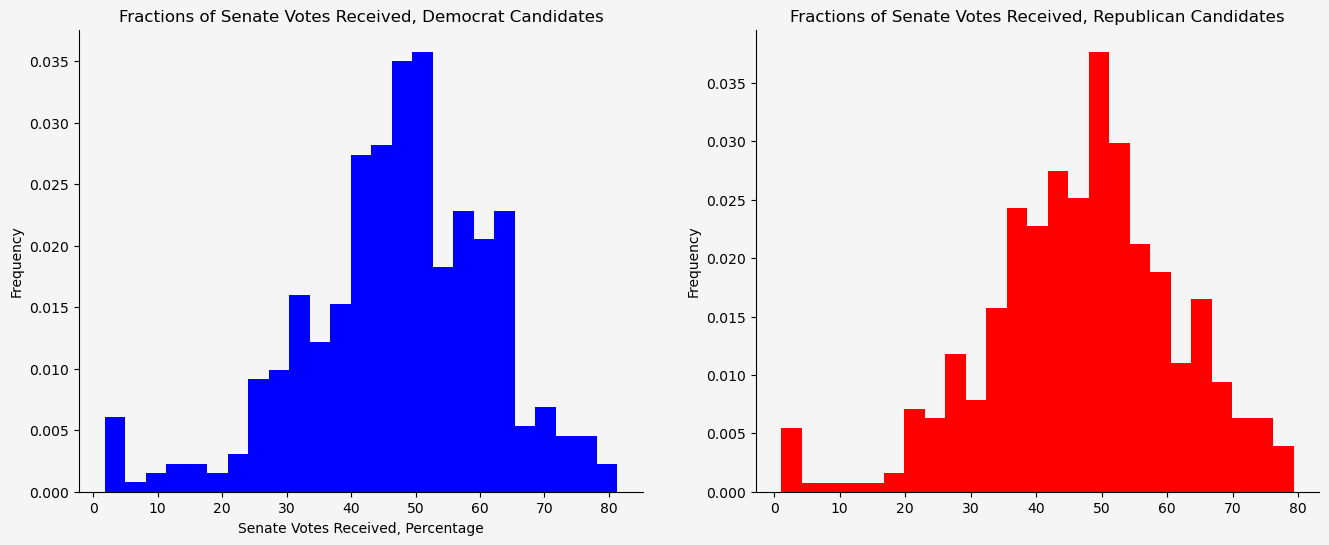

In [328]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))

dem_election.plot(kind="hist", y="%senate_vote", color= "b",bins=25, legend=False, density=True, ax=ax[0])
gop_election.plot(kind="hist", y="%senate_vote", color= "r",bins=25, legend=False, density=True, ax=ax[1])

ax[0].set_facecolor((0.96, 0.96, 0.96))
ax[1].set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].set_title("Fractions of Senate Votes Received, Democrat Candidates")
ax[1].set_title("Fractions of Senate Votes Received, Republican Candidates")

for (i, _ax) in enumerate(ax):
    if i == 0:
        _ax.set_xlabel("Senate Votes Received, Percentage")

From these two histograms, we are able to observe visually that the fraction of total votes received by both Democrat and Republican senator candidates tend to resemble a normal distribution with a mean close to 50%. 

This is important for our future research as it proves that the senate candidates from both parties tend to split votes with one another in general and there's no significant difference in the distribution between senator candidates from both parties, which enables us to draw a more general conclusion from data analysis in the future.

We then move to plot the histograms for fractions of votes received by Presidential candidates from Democrat Party and Republican Party.

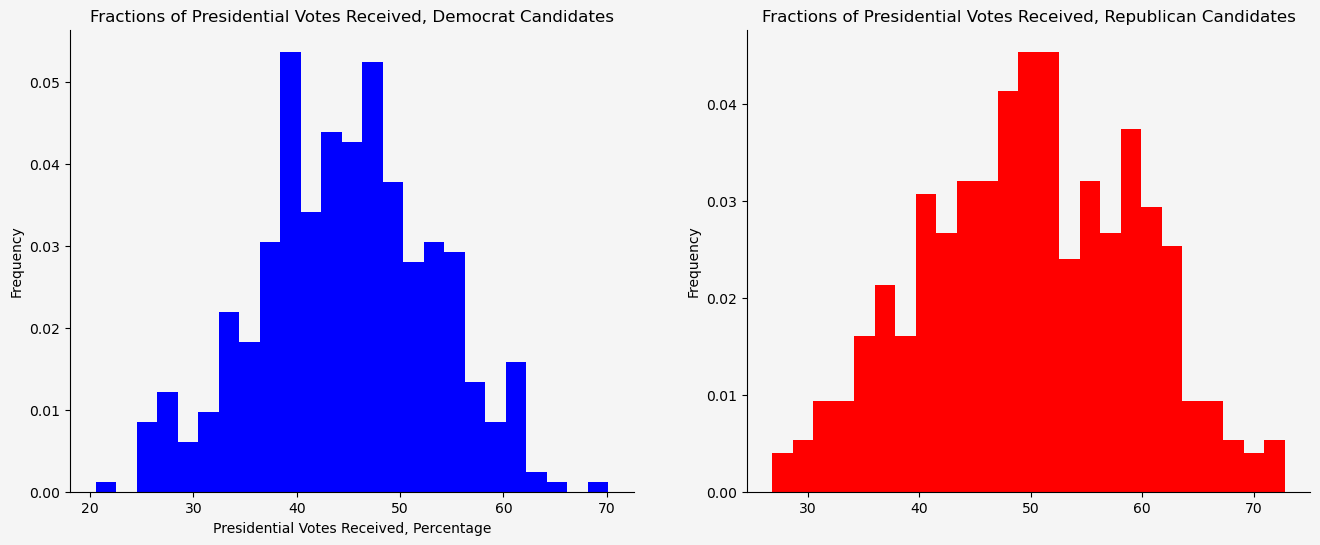

In [329]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))

dem_election.plot(kind="hist", y="%pres_vote", color= "b",bins=25, legend=False, density=True, ax=ax[0])
gop_election.plot(kind="hist", y="%pres_vote", color= "r",bins=25, legend=False, density=True, ax=ax[1])

ax[0].set_facecolor((0.96, 0.96, 0.96))
ax[1].set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].set_title("Fractions of Presidential Votes Received, Democrat Candidates")
ax[1].set_title("Fractions of Presidential Votes Received, Republican Candidates")

for (i, _ax) in enumerate(ax):
    if i == 0:
        _ax.set_xlabel("Presidential Votes Received, Percentage")

From these two histograms, we are able to observe visually that the fraction of total votes received by both Democrat and Republican Presidential candidates tend to resemble a normal distribution with a mean close to 50%. 

This is, like we just mentioned above in the Senate histogram, very important for our future research as it proves that the Presidential candidates from both parties tend to split votes with one another in general and there's no significant difference in the distribution between Presidential candidates from both parties, which enables us to draw a more general conclusion from data analysis in the future.

We then move to plot the histograms for total votes for Presidential elections and Senate elections in each state during the general election years.

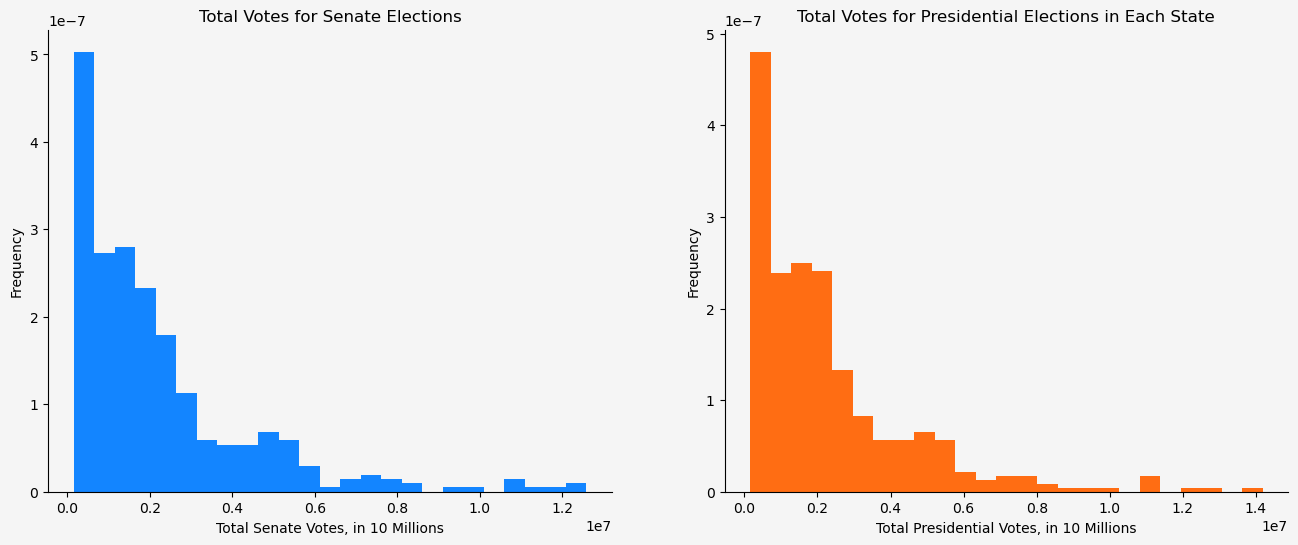

In [330]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))

general_election.plot(kind="hist", y="senate_tvotes", color= "#1385ff",bins=25, legend=False, density=True, ax=ax[0])
general_election.plot(kind="hist", y="pres_tvotes", color= "#ff6d13",bins=25, legend=False, density=True, ax=ax[1])

ax[0].set_facecolor((0.96, 0.96, 0.96))
ax[1].set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].set_title("Total Votes for Senate Elections")
ax[1].set_title("Total Votes for Presidential Elections in Each State")
for (i, _ax) in enumerate(ax):
    if i == 0:
        _ax.set_xlabel("Total Senate Votes, in 10 Millions")
    else:
        _ax.set_xlabel("Total Presidential Votes, in 10 Millions")

From these two histograms, we are able to observe visually that total votes in both Senate elections and Presidential elections by state.

The similarity between two histograms demonstrates the total votes for Senate elections and Presidential elections are largely consistent, so that a voter voting in the Presidential election is also highly like to vote in the Senate election.

Let's go to dive into the relationship between Y-variable and each X-variable.

### 4. 2. Scatter Plots for the Relation between Senate Vote Fraction and X-Variables

First, let's visualize the relation between the vote fraction received by the Presidential candidate and the fraction recevied by his / her senate candidate colleagues from the same party.

Specifically, we would like to examine **the effect of Donald Trump**, the Republican Presidential candidate in 2016 and 2020 elections, in the US election.

Conventionally, Donald Trump is described as a charismatic populist politican whose supporters have an almost unparalelled level of preference to him personally. To examine the robustness of this claim, we would like to plot the results in 2012 (pre-Trump era), 2016 (Trump's first campaign), 2020 (Trump's campaign for re-election) to see if there's any difference during the Trump era.

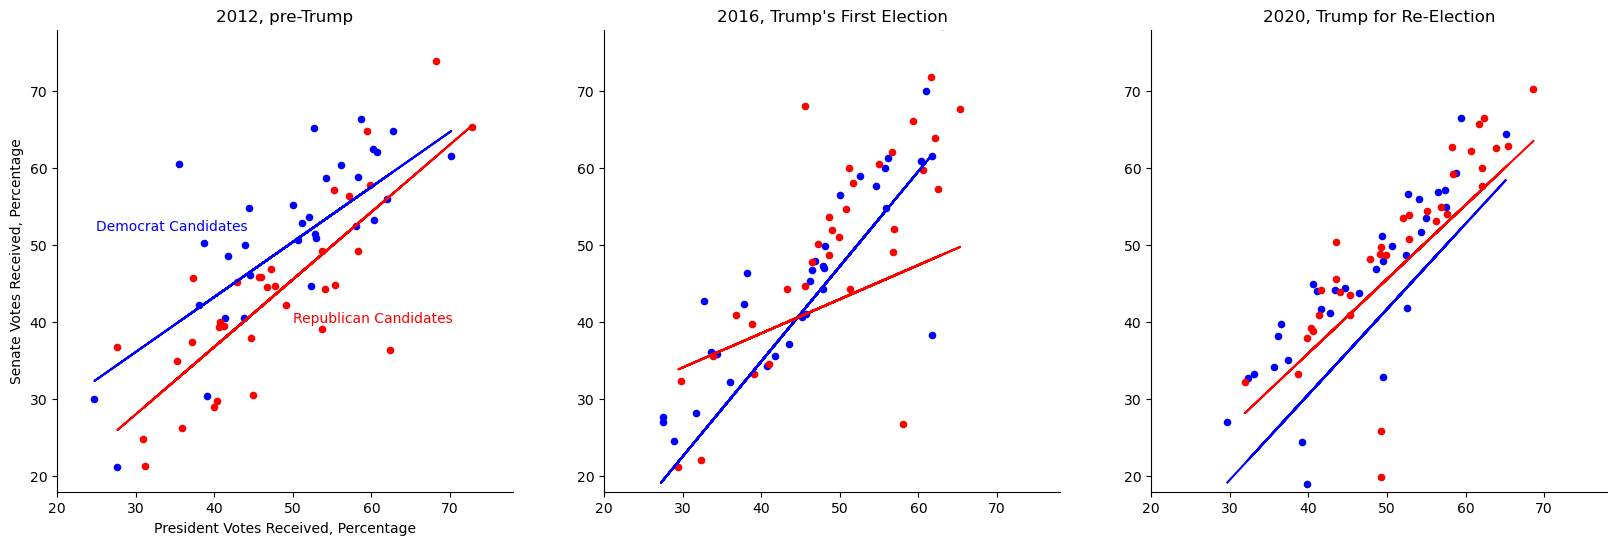

In [331]:
from sklearn.linear_model import LinearRegression
around_trump = general_election.loc[general_election["year"] >= 2012]


fig, ax = plt.subplots(1, around_trump["year"].nunique(), figsize = (20, 6))

for i in range(around_trump["year"].nunique()):
    plot = around_trump.loc[around_trump["year"] == 2012 + 4*i]
    dem_plot = plot.loc[around_trump["party"] == "DEMOCRAT"]
    gop_plot = plot.loc[around_trump["party"] == "REPUBLICAN"]
    
    dem_plot.plot(kind = "scatter", x = "%pres_vote", y="%senate_vote", ax=ax[i], color = "b")
    gop_plot.plot(kind= "scatter", x = "%pres_vote", y="%senate_vote", color= "r",legend=False, ax=ax[i])
    
    lr = LinearRegression()
    
    X_dem = dem_plot["%pres_vote"].values.reshape(-1,1)
    Y_dem = dem_plot["%senate_vote"].values.reshape(-1,1)
    
    X_gop = gop_plot["%pres_vote"].values.reshape(-1,1)
    Y_gop = gop_plot["%senate_vote"].values.reshape(-1,1)
    
    lr.fit(X_dem, Y_dem)
    Y_dem_pred = lr.predict(X_dem)
    ax[i].plot(X_dem, Y_dem_pred, color = "b")
    
    lr.fit(X_gop, Y_gop)
    Y_gop_pred = lr.predict(X_gop)
    ax[i].plot(X_gop, Y_gop_pred, color = "r")
    
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    
for (i, _ax) in enumerate(ax):
    if i == 0:
        _ax.set_xlabel("President Votes Received, Percentage")
        _ax.set_ylabel("Senate Votes Received, Percentage")
    else:
        _ax.set_xlabel("")
        _ax.set_ylabel("")
    # Change bounds
    _ax.set_ylim(18, 78)
    _ax.set_xlim(20, 78)

ax[0].set_title("2012, pre-Trump")
ax[1].set_title("2016, Trump's First Election")   
ax[2].set_title("2020, Trump for Re-Election") 
ax[0].annotate("Democrat Candidates", (25, 52), color= "b")
ax[0].annotate("Republican Candidates", (50,40), color="r")
ax[0].set_zorder(1)

From the graphs above, we can clearly observe two features of relationship between fractions of votes received by presidential candidates and senator candidates:

(1)  In general, there is a consistently **positive correlation** between fractions of votes received by a party's Presidential candidate and received by the same party's senator candidates. This is evident in both Republican Party and Democrat Party

(2) In terms of Presidential candidate **Donald Trump**, his personal popularity in the 2016 election **did not translated largely** into the Senate election results for his Republican colleagues.

We then move to explore the relationship between both total votes in Senatorial and Presidential elections and the fractions of each party's Senatorial candidates received.

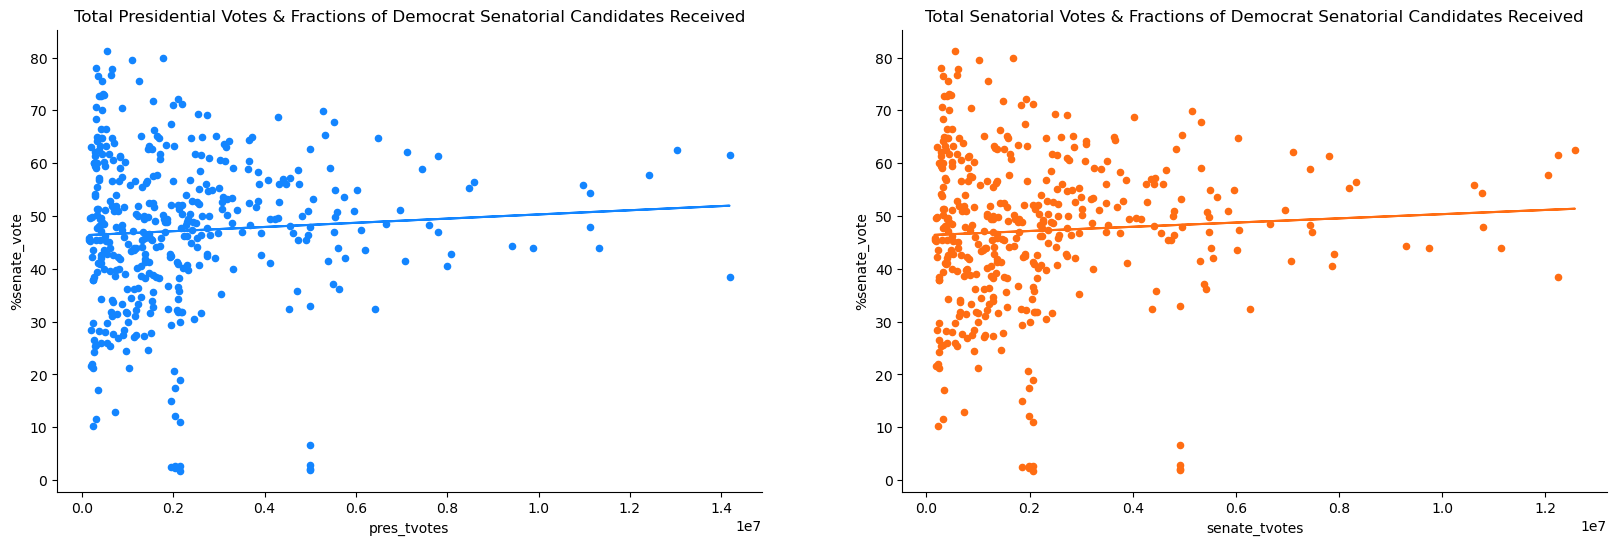

In [332]:
fig, ax = plt.subplots(1, 2 , figsize = (20, 6))


ax[0].set_title("Total Presidential Votes & Fractions of Democrat Senatorial Candidates Received")
ax[1].set_title("Total Senatorial Votes & Fractions of Democrat Senatorial Candidates Received")


ax[0].set_xlabel("Total Presidential Votes, in 10 Millions")
ax[1].set_ylabel("Senate Votes Received, Percentage")
ax[0].set_xlabel("Total Senatorial Votes, in 10 Millions")
ax[1].set_ylabel("Senate Votes Received, Percentage")
lr = LinearRegression()

dem_election.plot(kind = "scatter", x = "pres_tvotes", y="%senate_vote", ax=ax[0], color = "#1385ff")
dem_election.plot(kind = "scatter", x = "senate_tvotes", y="%senate_vote", ax=ax[1], color = "#ff6d13")
    
X_pres = dem_election["pres_tvotes"].values.reshape(-1,1)
Y_pres = dem_election["%senate_vote"].values.reshape(-1,1)
    
X_senate = dem_election["senate_tvotes"].values.reshape(-1,1)
Y_senate = dem_election["%senate_vote"].values.reshape(-1,1)
    
lr.fit(X_pres, Y_pres)
Y_pres_pred = lr.predict(X_pres)
ax[0].plot(X_pres, Y_pres_pred, color = "#1385ff")
    
lr.fit(X_senate, Y_senate)
Y_senate_pred = lr.predict(X_senate)
ax[1].plot(X_senate, Y_senate_pred, color ="#ff6d13")
    
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

From these graph, we can conclude that there is a weakly postive correlation between the total vote number in each state and the fraction of Democrat Senatorial candidates. This corresponds to results of the conventional qualitative analysis that the Democrat Party tends to perform better in elections in more populous states. However, such weal correlation does not imply causality

We now move to plot the relationships for the Repubican candidates

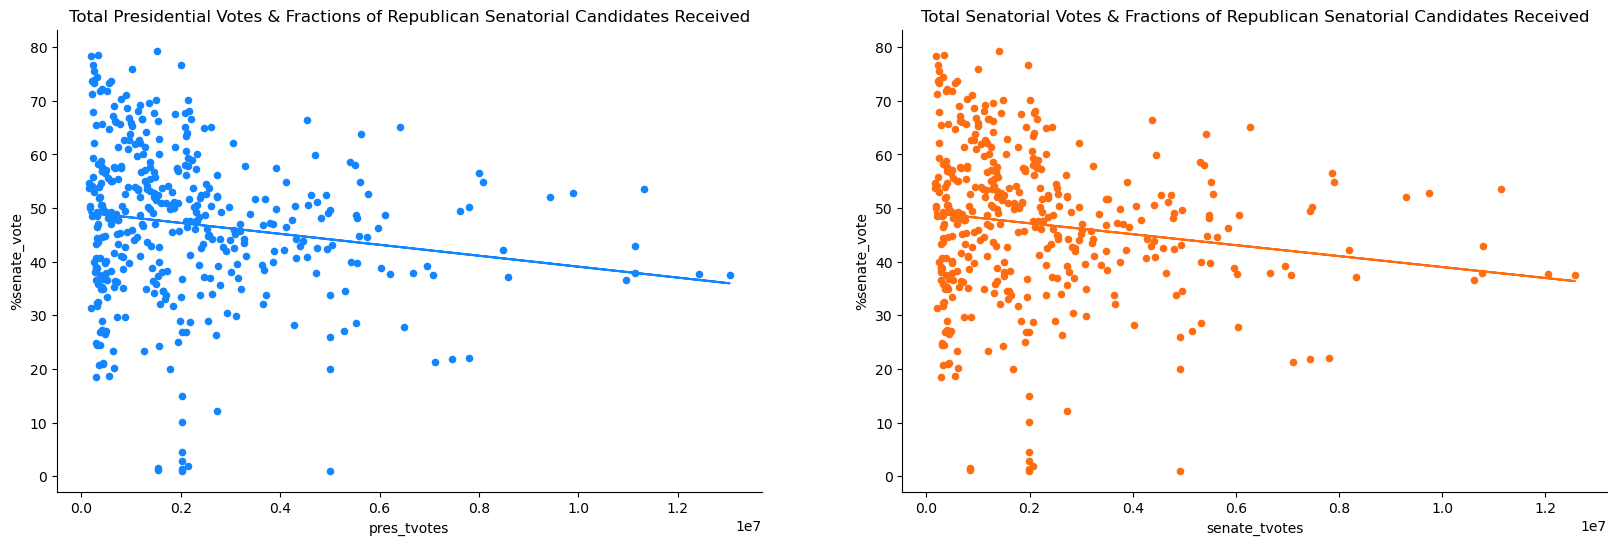

In [333]:
fig, ax = plt.subplots(1, 2 , figsize = (20, 6))


ax[0].set_title("Total Presidential Votes & Fractions of Republican Senatorial Candidates Received")
ax[1].set_title("Total Senatorial Votes & Fractions of Republican Senatorial Candidates Received")


ax[0].set_xlabel("Total Presidential Votes, in 10 Millions")
ax[1].set_ylabel("Senate Votes Received, Percentage")
ax[0].set_xlabel("Total Senatorial Votes, in 10 Millions")
ax[1].set_ylabel("Senate Votes Received, Percentage")
lr = LinearRegression()

gop_election.plot(kind = "scatter", x = "pres_tvotes", y="%senate_vote", ax=ax[0], color = "#1385ff")
gop_election.plot(kind = "scatter", x = "senate_tvotes", y="%senate_vote", ax=ax[1], color = "#ff6d13")
    
X_pres = gop_election["pres_tvotes"].values.reshape(-1,1)
Y_pres = gop_election["%senate_vote"].values.reshape(-1,1)
    
X_senate = gop_election["senate_tvotes"].values.reshape(-1,1)
Y_senate = gop_election["%senate_vote"].values.reshape(-1,1)
    
lr.fit(X_pres, Y_pres)
Y_pres_pred = lr.predict(X_pres)
ax[0].plot(X_pres, Y_pres_pred, color = "#1385ff")
    
lr.fit(X_senate, Y_senate)
Y_senate_pred = lr.predict(X_senate)
ax[1].plot(X_senate, Y_senate_pred, color ="#ff6d13")
    
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

From these graph, we can conclude that there is a weakly negative correlation between the total vote number in each state and the fraction of Republican Senatorial candidates. This corresponds to results of the conventional qualitative analysis that the Republican Party tends to perform better in elections in less populous states. However, such weal correlation does not imply causality

## 5. Conclusion

Through analysing the summary statistics and data visualization, we are able to conclude the following:

(1) The similarity between two histograms demonstrates the total votes for Senate elections and Presidential elections are largely consistent, so that a voter voting in the Presidential election is also highly like to vote in the Senate election.

(2) The Senatorial and Preisidential candidates from both parties tend to split votes with one another in general and there's no significant difference in the distributions between fractions of votes received by both Senatorial and Presidential candidates from both parties, which enables us to draw a more general conclusion from data analysis in the future.

(3) In general, there is a consistently positive correlation between fractions of votes received by a party's Presidential candidate and received by the same party's senator candidates. This is evident in both Republican Party and Democrat Party.

(4) A weakly negative correlation between the total vote number in each state and the fraction of Republican Senatorial candidates can be observe. This corresponds to results of the conventional qualitative analysis that the Republican Party tends to perform better in elections in less populous states. Vice versa, it is also true that in general Democrat Senatorial candidates perform better in more populous states. However, such weal correlation does not imply causality. Hence, future research on this is required.

(5) Specifically, tn terms of Presidential candidate Donald Trump, his personal popularity in the 2016 election did not translated largely into the Senate election results for his Republican colleagues.

The future stages of the research will include data analysis, specifically modelling and regression analysis, to further analyze the relationship between results of the Presidential elections and the Senatorial elections. Moreover, additional datasets, such demographic and economic sizes over time for each state, would be included to support further analysis.